"""
Crypto Sentiment
~~~~~~~~~~~~~~~~

This module provides Sentimental Analysis fo news articles for Bitcoin and Ethereum.

This module calls NEWSAPI to pull data for news articles. 

It provides a sentiment score which judges the probable emotions in the text - 

- Use VADER, VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment 
  analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
  VADER does not need labeled data but will use dictionary of sentiments to categorize text into positive, 
  negative and neutral.

- We will also be creating a word cloud based on the relevance of key words occuring most which probably defined
  the sentiment score.

- In the end we will do NER.....

"""


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BalleBalle\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
#Define Function to get news article based on a search keyword
def get_news_articles(keyword):
    """ # Function to take query word and return all the articles defined by relevancy
         :param keyword - search keyword

    """
        
    articles=newsapi.get_everything(
    q=keyword, # query phrase, what word to look for,
    page_size= 100,  # maximum is 100,
    sort_by='relevancy', #  relevant news associated with the search phrase
    language='en' #Get only English articles
     )
    return articles['articles']
    


In [6]:
# Fetch the Bitcoin news articles

bitcoin_news = get_news_articles('bitcoin')

In [7]:
# Fetch the Ethereum news articles
eth_news = get_news_articles('ethereum')


In [9]:
#Define Function to create dataframe for keyword and sentiment score
def df_Sentiment_keyword(article):
    """ # Function to take article having the keyword and return a dataframe with sentiment score
         :param article - article json

    """
    xdf = pd.DataFrame.from_dict(article)
    #Drop sourcem author, url,urlToImage columns
    xdf.drop(['source','author','url','urlToImage'], axis=1, inplace=True)
    #Get the sentiment score - We will combine title and description to get the total score
   
    xdf['Article_Text'] = xdf['title'] + ' ' + xdf['description'] +  ' ' + xdf['content']
    
    #Create new columns for scores
    xdf['c_compound'] = [analyzer.polarity_scores(x)['compound'] for x in xdf['Article_Text']]
    xdf['c_neg'] = [analyzer.polarity_scores(x)['neg'] for x in xdf['Article_Text']]
    xdf['c_neu'] = [analyzer.polarity_scores(x)['neu'] for x in xdf['Article_Text']]
    xdf['c_pos'] = [analyzer.polarity_scores(x)['pos'] for x in xdf['Article_Text']]
    
    #Create a column for labeling a sentiment score.
    #We will use 0.5 as the threshhold
    xdf['Sentiment Score'] = 'Neutral'
    xdf.loc[xdf['c_compound'] >= 0.5, 'Sentiment Score'] = 'Positive'
    xdf.loc[xdf['c_compound'] <= -0.5, 'Sentiment Score'] = 'Negative'                                                         
    
   
    
    #Return a dataframe with all sentiment scores and articles  
    return xdf[['publishedAt','title','description','content','Article_Text','c_compound','c_neg','c_neu','c_pos','Sentiment Score']]
     
    
    

In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df=df_Sentiment_keyword(bitcoin_news)
bitcoin_df.head()

,publishedAt,title,description,content,Article_Text,c_compound,c_neg,c_neu,c_pos,Sentiment Score
0,2022-02-09T16:00:00Z,Is the Crypto Bubble Going to Burst?,Even if you aren’t paying attention to Bitcoin...,Even if you arent paying attention to Bitcoin ...,Is the Crypto Bubble Going to Burst? Even if y...,0.8271,0.000,0.885,0.115,Positive
1,2022-01-25T22:11:14Z,The International Monetary Fund tells El Salva...,The International Monetary Fund’s executive di...,El Salvador introduced Bitcoin as a legal tend...,The International Monetary Fund tells El Salva...,0.4404,0.026,0.876,0.097,Neutral
2,2022-01-27T18:16:57Z,DeepDotWeb operator sentenced to eight years f...,"The operator of DeepDotWeb, a site that indexe...",Israeli national Tal Prihar pled guilty to rou...,DeepDotWeb operator sentenced to eight years f...,-0.6486,0.109,0.870,0.021,Negative
3,2022-01-20T13:23:31Z,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",Crypto.com admits over $30 million stolen by h...,-0.4215,0.089,0.847,0.064,Neutral
4,2022-02-11T19:22:41Z,Netflix is already making a docuseries about t...,Netflix\r\n is making a docuseries about one o...,Netflix\r\n is making a docuseries about one o...,Netflix is already making a docuseries about t...,-0.9325,0.165,0.835,0.000,Negative


<AxesSubplot:xlabel='Sentiment Score', ylabel='count'>

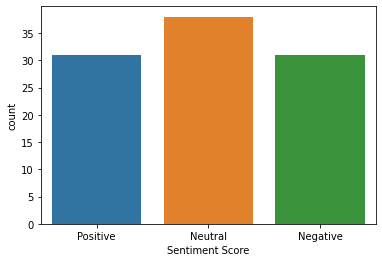

In [11]:
#Let's see the distribution of sentiment score
sns.countplot(data = bitcoin_df
            ,x = 'Sentiment Score'
            )

In [12]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df=df_Sentiment_keyword(eth_news)
ethereum_df.head()

,publishedAt,title,description,content,Article_Text,c_compound,c_neg,c_neu,c_pos,Sentiment Score
0,2022-01-20T13:23:31Z,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",Crypto.com admits over $30 million stolen by h...,-0.4215,0.089,0.847,0.064,Neutral
1,2022-01-19T12:00:00Z,Hackers Launder $15 Million Stolen From Crypto...,Hackers who made off with roughly $15 million ...,Hackers who made off with roughly $15 million ...,Hackers Launder $15 Million Stolen From Crypto...,-0.2023,0.037,0.935,0.028,Neutral
2,2022-01-20T19:54:48Z,Eric Adams Is Taking His First Paycheck in Crypto,"Mr. Adams, who wants New York City to become t...","On some level, the new mayor is simply employi...",Eric Adams Is Taking His First Paycheck in Cry...,0.1779,0.000,0.974,0.026,Neutral
3,2022-01-21T22:57:21Z,Robinhood opens cryptocurrency wallet to beta ...,"Back in September\r\n, Robinhood announced pla...","Back in September\r\n, Robinhood announced pla...",Robinhood opens cryptocurrency wallet to beta ...,0.1531,0.000,0.969,0.031,Neutral
4,2022-02-10T14:00:00Z,Playing With Crypto? You’ll Need a Wallet (or ...,Buying and selling NFTs or transferring digita...,If people who buy cryptocurrencies intended on...,Playing With Crypto? You’ll Need a Wallet (or ...,0.3687,0.033,0.881,0.086,Neutral


<AxesSubplot:xlabel='Sentiment Score', ylabel='count'>

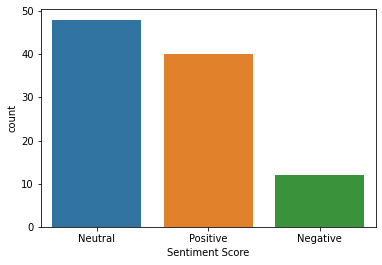

In [13]:
#Let's see the distribution of sentiment score
sns.countplot(data = ethereum_df
            ,x = 'Sentiment Score'
            )

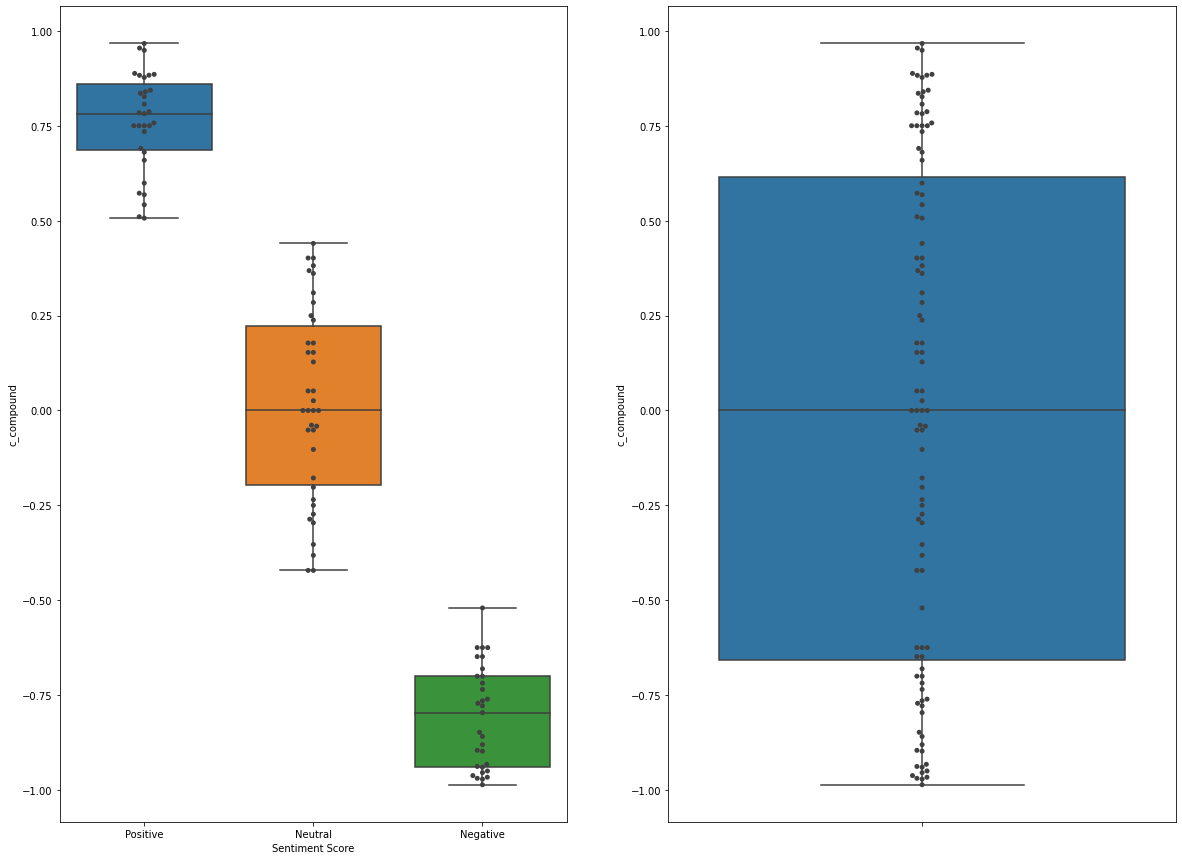

In [14]:

# Visualize distribution of compound score for bitcoin

fig, axes = plt.subplots(1, 2,figsize=(20,15))


sns.boxplot(x="Sentiment Score", y="c_compound", data=bitcoin_df, ax=axes[0])
sns.swarmplot(x="Sentiment Score", y="c_compound", data=bitcoin_df, color=".25",ax=axes[0])

sns.boxplot( y="c_compound", data=bitcoin_df,ax=axes[1])
sns.swarmplot( y="c_compound", data=bitcoin_df,color=".25",ax=axes[1])
plt.show()

Let’s take the first box plot i.e, blue box plot of the figure and understand these statistical things:
Bottom black horizontal line of blue box plot is minimum value
First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
Top black horizontal line of rectangle shape of blue box plot is maximum value.


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,c_compound,c_neg,c_neu,c_pos
count,100.000000,100.000000,100.000000,100.000000
mean,-0.006512,0.075610,0.851620,0.072720
std,0.649382,0.075212,0.083763,0.056792
min,-0.986400,0.000000,0.603000,0.000000
25%,-0.656650,0.014250,0.809000,0.030750
50%,0.000000,0.061000,0.855500,0.064500
75%,0.614475,0.109250,0.911250,0.097250
max,0.967400,0.325000,1.000000,0.244000


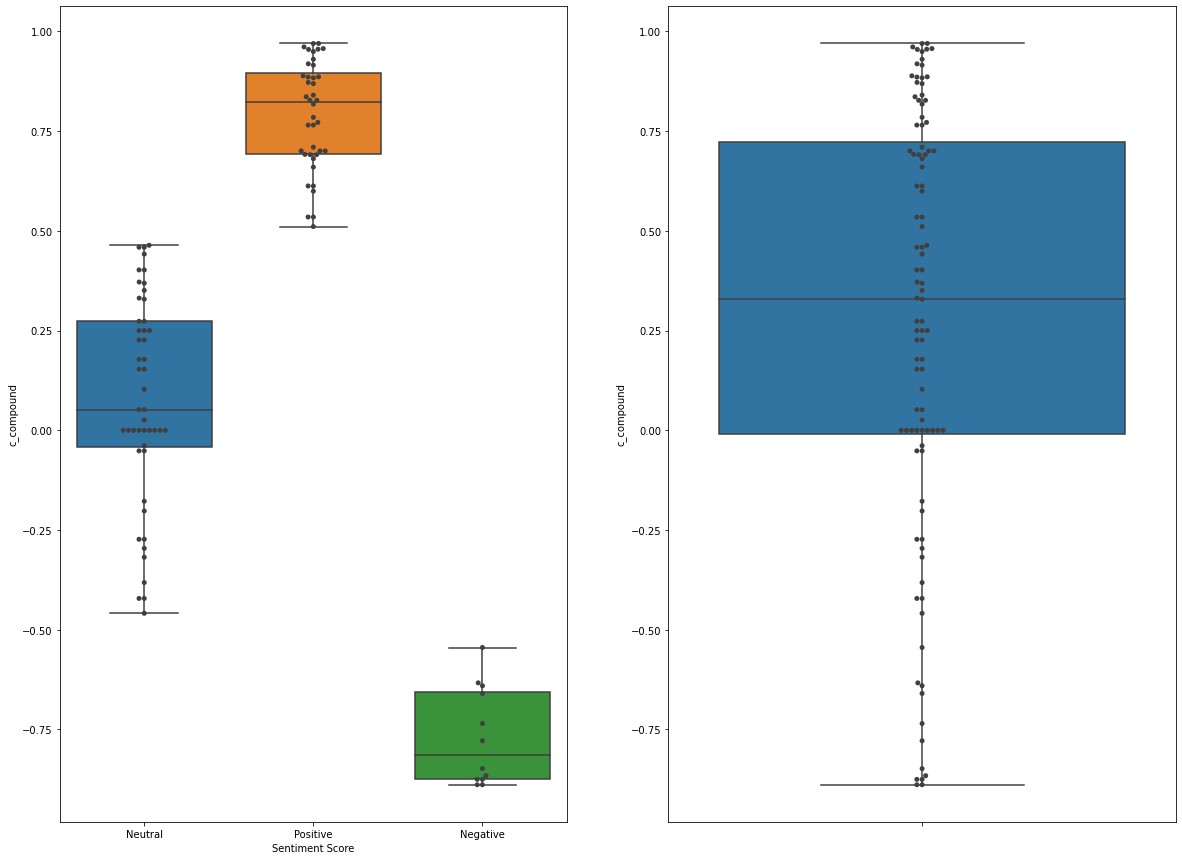

In [16]:

# Visualize distribution of compound score for Ethereum

fig, axes = plt.subplots(1, 2,figsize=(20,15))


sns.boxplot(x="Sentiment Score", y="c_compound", data=ethereum_df, ax=axes[0])
sns.swarmplot(x="Sentiment Score", y="c_compound", data=ethereum_df, color=".25",ax=axes[0])

sns.boxplot( y="c_compound", data=ethereum_df,ax=axes[1])
sns.swarmplot( y="c_compound", data=ethereum_df,color=".25",ax=axes[1])
plt.show()

In [17]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,c_compound,c_neg,c_neu,c_pos
count,100.000000,100.000000,100.000000,100.000000
mean,0.260482,0.037710,0.878680,0.083550
std,0.547367,0.046428,0.075026,0.064935
min,-0.888500,0.000000,0.674000,0.000000
25%,-0.009675,0.000000,0.838250,0.035750
50%,0.329900,0.028000,0.885000,0.073500
75%,0.723450,0.056500,0.929500,0.110250
max,0.969600,0.187000,1.000000,0.272000


In [18]:
### Questions:

#Q: Which coin had the highest mean positive score?
print (f"{bitcoin_df.describe()['c_pos']['mean']} :Bitcoin has highest mean positive score" if bitcoin_df.describe()['c_pos']['mean'] >
       ethereum_df.describe()['c_pos']['mean'] else f"{ethereum_df.describe()['c_pos']['mean']} :Ethereum has highest mean positive score")

#Q: Which coin had the highest compound score?

print (f"{bitcoin_df.describe()['c_compound']['max']} :Bitcoin has highest compound score" if bitcoin_df.describe()['c_compound']['max'] >
       ethereum_df.describe()['c_compound']['max'] else f"{ethereum_df.describe()['c_compound']['max']} :Ethereum has highest compound score")

#Q. Which coin had the highest positive score?

print (f"{bitcoin_df.describe()['c_pos']['max']} :Bitcoin has highest positive score" if bitcoin_df.describe()['c_pos']['max'] >
       ethereum_df.describe()['c_pos']['max'] else f"{ethereum_df.describe()['c_pos']['max']} :Ethereum has highest positive score")

0.08354999999999999 :Ethereum has highest mean positive score
0.9696 :Ethereum has highest compound score
0.272 :Ethereum has highest positive score


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
# Lemmatize with POS Tag
from nltk.corpus import wordnet
from collections import Counter
import re
nltk.download('averaged_perceptron_tagger')
from pprint import pprint
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BalleBalle\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


In [21]:
# Check word distribution for bitcoin articles
result_bitcoin = Counter()

bitcoin_df['Article_Text'].str.lower().str.split().apply(lambda x: [w.strip() for w in x if w.strip() not in sw]).apply(result_bitcoin.update)
print(dict(result_bitcoin.most_common(20)))


Counter({'bitcoin': 153, 'chars]': 99, 'crypto': 61, '-': 61, 'cryptocurrency': 52, 'new': 37, 'reuters': 32, 'el': 28, '…': 27, 'said': 23, '(reuters)': 23, 'million': 22, 'salvador': 20, 'one': 20, 'billion': 20, 'stolen': 18, 'u.s.': 17, 'market': 16, 'us': 16, 'digital': 16, 'financial': 16, 'last': 15, 'international': 15, 'exchange': 15, 'bitcoin,': 15, 'according': 15, 'monetary': 14, 'russian': 14, 'mining': 14, 'trading': 14, 'monday': 14, 'launder': 13, 'cryptocurrencies': 13, '$3.6': 13, 'hack': 13, 'fears': 13, 'tuesday': 13, 'heather': 12, 'could': 12, 'justice': 12, 'jan': 12, 'feb': 12, 'says': 12, 'legal': 11, 'ilya': 11, 'week': 11, '2016': 11, 'largest': 11, 'first': 11, 'couple': 11, 'people': 11, 'ukraine': 11, 'lowest': 11, 'six': 11, 'investors': 11, 'fund': 10, 'crypto.com': 10, 'ethereum': 10, 'since': 10, 'department': 10, 'would': 10, 'assets': 10, 'year': 9, 'money': 9, 'company': 9, 'thursday': 9, 'morgan': 9, 'york': 9, 'buy': 9, 'currency': 9, 'made': 9, '

In [22]:
result_eth = Counter()
# Check word distribution for bitcoin articles
ethereum_df['Article_Text'].str.lower().str.split().apply(lambda x: [w.strip() for w in x if w.strip() not in sw]).apply(result_eth.update)
print(dict(result_eth.most_common(20)))

Counter({'chars]': 94, 'ethereum': 64, 'crypto': 46, 'cryptocurrency': 43, 'new': 39, 'bitcoin': 36, 'nft': 34, '-': 30, 'million': 29, 'digital': 26, 'blockchain': 25, 'said': 22, 'nfts': 22, 'market': 20, 'company': 17, '…': 17, 'platform': 16, 'online': 15, 'hackers': 14, 'users': 14, 'according': 13, 'announced': 13, 'cryptocurrencies': 13, 'marketplace': 13, 'twitter': 13, 'reuters': 13, 'people': 12, 'get': 12, '—': 12, '(reuters)': 12, 'newsletter': 12, 'use': 12, 'crypto.com': 11, 'first': 11, 'capital': 11, 'token': 11, 'trading': 11, 'ethereum,': 11, 'non-fungible': 11, 'profile': 10, 'led': 10, 'one': 10, 'tokens': 10, 'protocol': 10, 'league': 10, 'stolen': 9, 'funds': 9, 'adams': 9, 'york': 9, 'global': 9, 'mayor': 9, 'make': 9, 'like': 9, 'india': 9, 'popular': 9, 'could': 9, 'friday,': 9, 'future': 9, 'finance': 9, 'eric': 8, 'city': 8, 'buy': 8, 'coins': 8, 'sequoia': 8, 'stock': 8, 'assets': 8, 'support': 8, 'firm': 8, 'record': 8, 'network': 8, 'premier': 8, 'money': 

In [53]:
# Expand the default stopwords, based on above output, we will add some more to stopwords

sw_custom_coin = {'chars]','would','says','going','monday','tuesday','week','going','hours','bitcoin','cryptocurrency','cryptocurrencies','called','made','since','also','two','going','ethereum','crypto','char','say','new','el','reuters','u','take','blockchain'}
sw=sw.union(sw_custom_coin)

In [25]:
#Create function to create POS tags to be used for lemmentization.
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    # Define the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    # Apply regex parameters to article
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    # Apply `word_tokenize` to the regex scrubbed text
    re_words = word_tokenize(re_clean)
    # Create list of lower-case words that are not in the stopword set
    
    re_result = [word.lower() for word in re_words if word.lower() not in sw]
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in re_result]
    #Since it is possible that some of the words may have been reduced due to above so check again against Stop Words.
    tokens = [word.lower() for word in tokens if word.lower() not in sw]
    
    return tokens

In [38]:
# Create a new tokens column for Bitcoin
bitcoin_df['Token']=bitcoin_df['Article_Text'].apply(tokenizer)
bitcoin_df.head()

,publishedAt,title,description,content,Article_Text,c_compound,c_neg,c_neu,c_pos,Sentiment Score,Token
0,2022-02-09T16:00:00Z,Is the Crypto Bubble Going to Burst?,Even if you aren’t paying attention to Bitcoin...,Even if you arent paying attention to Bitcoin ...,Is the Crypto Bubble Going to Burst? Even if y...,0.8271,0.000,0.885,0.115,Positive,"[bubble, burst, even, arent, pay, attention, m..."
1,2022-01-25T22:11:14Z,The International Monetary Fund tells El Salva...,The International Monetary Fund’s executive di...,El Salvador introduced Bitcoin as a legal tend...,The International Monetary Fund tells El Salva...,0.4404,0.026,0.876,0.097,Neutral,"[international, monetary, fund, tell, salvador..."
2,2022-01-27T18:16:57Z,DeepDotWeb operator sentenced to eight years f...,"The operator of DeepDotWeb, a site that indexe...",Israeli national Tal Prihar pled guilty to rou...,DeepDotWeb operator sentenced to eight years f...,-0.6486,0.109,0.870,0.021,Negative,"[deepdotweb, operator, sentence, eight, year, ..."
3,2022-01-20T13:23:31Z,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",Crypto.com admits over $30 million stolen by h...,-0.4215,0.089,0.847,0.064,Neutral,"[cryptocom, admits, million, steal, hacker, ex..."
4,2022-02-11T19:22:41Z,Netflix is already making a docuseries about t...,Netflix\r\n is making a docuseries about one o...,Netflix\r\n is making a docuseries about one o...,Netflix is already making a docuseries about t...,-0.9325,0.165,0.835,0.000,Negative,"[netflix, already, make, docuseries, allege, b..."


In [40]:
# Create a new tokens column for Ethereum
ethereum_df['Token']=ethereum_df['Article_Text'].apply(tokenizer)
ethereum_df.head()

,publishedAt,title,description,content,Article_Text,c_compound,c_neg,c_neu,c_pos,Sentiment Score,Token
0,2022-01-20T13:23:31Z,Crypto.com admits over $30 million stolen by h...,Cryptocurrency exchange Crypto.com has said th...,"In a new blog post the company said that 4,836...",Crypto.com admits over $30 million stolen by h...,-0.4215,0.089,0.847,0.064,Neutral,"[cryptocom, admits, million, steal, hacker, ex..."
1,2022-01-19T12:00:00Z,Hackers Launder $15 Million Stolen From Crypto...,Hackers who made off with roughly $15 million ...,Hackers who made off with roughly $15 million ...,Hackers Launder $15 Million Stolen From Crypto...,-0.2023,0.037,0.935,0.028,Neutral,"[hacker, launder, million, steal, cryptocom, u..."
2,2022-01-20T19:54:48Z,Eric Adams Is Taking His First Paycheck in Crypto,"Mr. Adams, who wants New York City to become t...","On some level, the new mayor is simply employi...",Eric Adams Is Taking His First Paycheck in Cry...,0.1779,0.000,0.974,0.026,Neutral,"[eric, adam, take, first, paycheck, mr, adam, ..."
3,2022-01-21T22:57:21Z,Robinhood opens cryptocurrency wallet to beta ...,"Back in September\r\n, Robinhood announced pla...","Back in September\r\n, Robinhood announced pla...",Robinhood opens cryptocurrency wallet to beta ...,0.1531,0.000,0.969,0.031,Neutral,"[robinhood, open, wallet, beta, tester, back, ..."
4,2022-02-10T14:00:00Z,Playing With Crypto? You’ll Need a Wallet (or ...,Buying and selling NFTs or transferring digita...,If people who buy cryptocurrencies intended on...,Playing With Crypto? You’ll Need a Wallet (or ...,0.3687,0.033,0.881,0.086,Neutral,"[play, youll, need, wallet, several, buying, s..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [41]:
from collections import Counter
from nltk import ngrams

In [42]:
# Generate the Bitcoin N-grams where N=2
#Join all the values of Token column
bitcoin_tokens=' '.join([' '.join(map(str, l)) for l in bitcoin_df['Token']])
n=2 #Inititalize gram value
bitcoin_2_gram = ngrams(bitcoin_tokens.split(), n)

In [44]:
# Generate the Ethereum N-grams where N=2
eth_tokens=' '.join([' '.join(map(str, l)) for l in ethereum_df['Token']])
n=2 #Inititalize gram value
eth_2_gram = ngrams(eth_tokens.split(), n)

In [45]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    tokens=tokens.split()
    N=N
    return Counter(tokens).most_common(N)

In [46]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10_words=token_count(bitcoin_tokens,10)
bitcoin_top10_words

[('salvador', 28),
 ('million', 28),
 ('market', 27),
 ('billion', 25),
 ('low', 25),
 ('steal', 24),
 ('year', 21),
 ('one', 20),
 ('exchange', 19),
 ('hack', 19)]

In [48]:
# Use token_count to get the top 10 words for Ethereum
eth_top10_words=token_count(eth_tokens,10)
eth_top10_words

[('nft', 39),
 ('million', 33),
 ('blockchain', 31),
 ('nfts', 30),
 ('market', 28),
 ('digital', 26),
 ('token', 23),
 ('company', 20),
 ('take', 20),
 ('hacker', 19)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

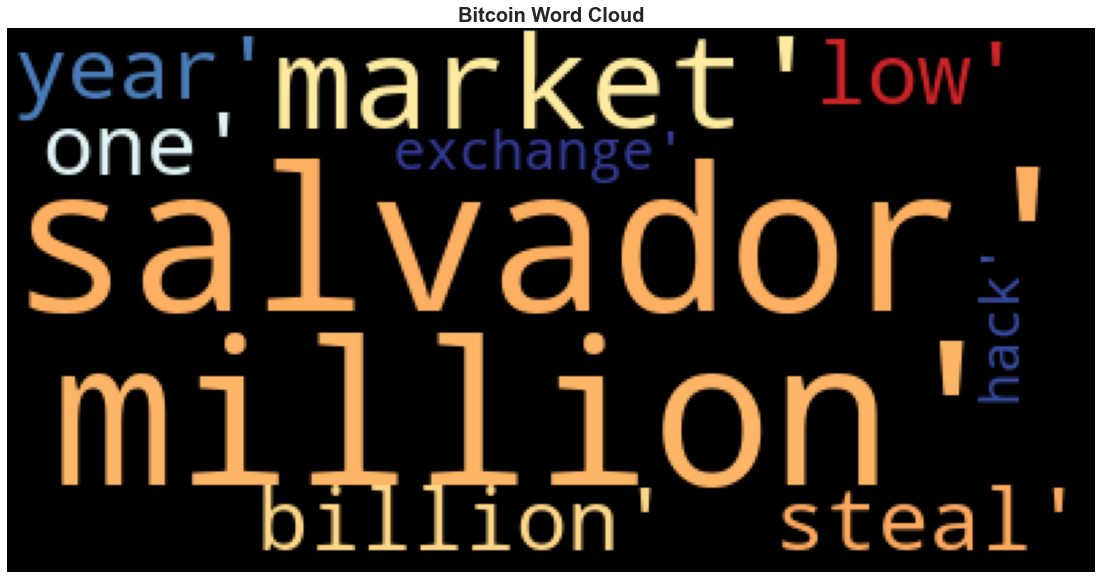

In [51]:
# Generate the Bitcoin word cloud
# Create a string list of terms to generate the word cloud
terms_list = str(bitcoin_top10_words)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

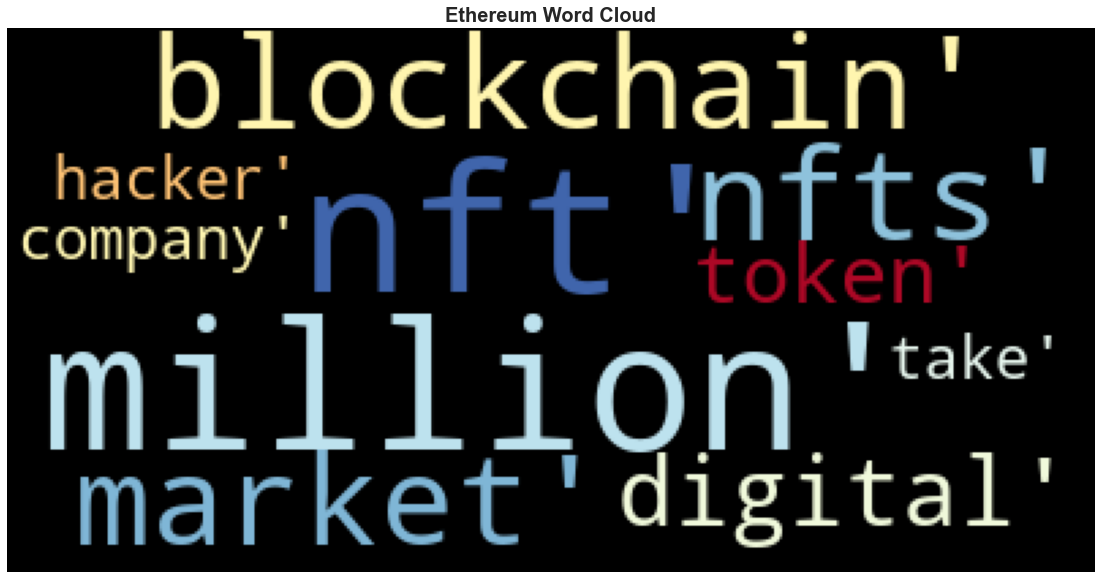

In [52]:
# Generate the Ethereum word cloud
terms_list = str(eth_top10_words)
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [54]:
import spacy
from spacy import displacy

In [55]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [56]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [76]:
# Run the NER processor on all of the text
# We will use the combine data frame column.
bitcoin_text= nlp(' '.join(bitcoin_df['Article_Text']))


# Add a title to the document
bitcoin_text.user_data["title"] = "Bitcoin NER visualization"

In [77]:
# Render the visualization
displacy.render(bitcoin_text,style="ent",jupyter=True)

In [78]:
#Total entities
len(bitcoin_text.ents)

# List all Entities
pprint([(X.text, X.label_) for X in bitcoin_text.ents])

934

[('last week', 'DATE'),
 ('$3 trillion', 'MONEY'),
 ('last year', 'DATE'),
 ('about $1.5 trillion', 'MONEY'),
 ('a matter of days', 'DATE'),
 ('last week', 'DATE'),
 ('3', 'MONEY'),
 ('The International Monetary Fund', 'ORG'),
 ('El Salvador', 'GPE'),
 ('The International Monetary Fund’s', 'ORG'),
 ('El Salvador', 'GPE'),
 ('El Salvador', 'GPE'),
 ('US', 'GPE'),
 ('2021', 'DATE'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('The International Monetary Fund’s', 'ORG'),
 ('El', 'ORG'),
 ('eight years', 'DATE'),
 ('Tor', 'ORG'),
 ('eight years', 'DATE'),
 ('Bitcoin', 'WORK_OF_ART'),
 ('Israeli', 'NORP'),
 ('Tal Prihar', 'PERSON'),
 ('Illustration', 'ORG'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('two-year', 'DATE'),
 ('Crypto.com', 'ORG'),
 ('$30 million', 'MONEY'),
 ('hackers Cryptocurrency', 'ORG'),
 ('Crypto.com', 'ORG'),
 ('$15 million', 'MONEY'),
 ('$18 million', 'MONEY'),
 ('4,836', 'CARDINAL'),
 ('ETH', 'ORG'),
 ('443', 'CARDINAL'),
 ('Alex Castro', 'PERSON'),
 ('Verg

---

### Ethereum NER

In [80]:
# Run the NER processor on all of the text
# We will use the combine data frame column.
eth_text= nlp(' '.join(ethereum_df['Article_Text']))

# Add a title to the document
eth_text.user_data["title"] = "Ethereum NER visualization"



In [81]:
# Render the visualization
displacy.render(eth_text,style="ent",jupyter=True)

In [82]:
#Total entities
len(eth_text.ents)

# List all Entities

pprint([(X.text, X.label_) for X in eth_text.ents])

781

[('Crypto.com', 'ORG'),
 ('$30 million', 'MONEY'),
 ('hackers Cryptocurrency', 'ORG'),
 ('Crypto.com', 'ORG'),
 ('$15 million', 'MONEY'),
 ('$18 million', 'MONEY'),
 ('4,836', 'CARDINAL'),
 ('ETH', 'ORG'),
 ('443', 'CARDINAL'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('the early hours', 'TIME'),
 ('Thursday', 'DATE'),
 ('morning', 'TIME'),
 ('Hackers Launder', 'ORG'),
 ('$15 Million', 'MONEY'),
 ("Crypto.com Using Ethereum '", 'ORG'),
 ('roughly $15 million', 'MONEY'),
 ('Crypto.com', 'ORG'),
 ('Tornado Cash', 'PERSON'),
 ('Peck Shield', 'PRODUCT'),
 ('roughly $15 million', 'MONEY'),
 ('Crypto.com', 'ORG'),
 ('Tornado Cash', 'PERSON'),
 ('Eric Adams Is Taking', 'PERSON'),
 ('First Paycheck', 'ORG'),
 ('Crypto', 'GPE'),
 ('Adams', 'PERSON'),
 ('New York City', 'GPE'),
 ('Bitcoin and Ethereum', 'ORG'),
 ('Fintech', 'ORG'),
 ('New York City', 'GPE'),
 ('September', 'DATE'),
 ('Robinhood', 'ORG'),
 ('September', 'DATE'),
 ('Robinhood', 'ORG'),
 ('Ethereum Ethereum', 'ORG'),
 ('ETH-

---